# Using A/B testing to determine whether a company should keep its old homepage

Finding out whether a company should keep its old page or its new page, or take further time to collect data and make a decision.

This project used A/B testing to determine one of the above options.

## Data Wrangling

The data was collected by the company and provided by Udacity.

### Information about the data

Converted: whether or not the user bought the product. 1 means yes, 0 means no.
Landing_page: Whether the user returned to the old page or the new page.
Group: Whether the user belonged to the control or the treatment group (treatment group tried out the new page).
TimeStamp: Date and time.
User_id: Unique ID of the user.

The data was read in below:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
ab_data = pd.read_csv('ab_data.csv')
ab_data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Obtaining basic information about the dataset. This information is listed in the next section:

In [3]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
ab_data.loc[(ab_data['group']=='treatment') & (ab_data['landing_page'] == 'old_page')]

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


So 1965 rows are incorrectly labelled so that "treatment" is mapped to "old_page". 

Checking whether control users were given "old_page":

In [5]:
ab_data.loc[(ab_data['group']=='control') & (ab_data['landing_page'] == 'new_page')]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


So 1928 rows are incorrectly labelled.

Finding how many unique users there were:

In [6]:
ab_data.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [7]:
ab_data.loc[(ab_data['converted'] == 1)]

,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1
...,...,...,...,...,...
294396,838593,2017-01-15 09:56:31.455023,treatment,new_page,1
294405,712217,2017-01-11 10:34:30.176801,control,old_page,1
294420,795742,2017-01-09 01:06:58.299207,control,old_page,1
294430,733871,2017-01-21 17:54:08.810964,treatment,new_page,1


In [8]:
ab_data.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Drop the incorrectly labelled data:

In [9]:
treatment = ab_data[(ab_data['group']=='treatment') & (ab_data['landing_page'] == 'new_page')]

In [10]:
control = ab_data[(ab_data['group']=='control') & (ab_data['landing_page'] == 'old_page')]

In [11]:
ab_cleaned = pd.concat([treatment,control], ignore_index='True')

In [12]:
ab_cleaned.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [13]:
ab_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [14]:
ab_cleaned.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

The number of unique users is 290584.

In [15]:
print(ab_cleaned[ab_cleaned.duplicated()])

Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []


In [16]:
ab_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [17]:
N_conversions = ab_cleaned[(ab_cleaned['converted'] == 1)].count()
N_rows = ab_cleaned.count()

In [18]:
p_convert = N_conversions/N_rows
p_convert

user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

Now calculating the probability of converting given that the individual was in the control group:

In [19]:
control = ab_cleaned[ab_cleaned['group']=='control'].count()
p_old = ab_cleaned[ab_cleaned['group']=='control']['converted'].sum()/control
p_old

user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

In [20]:
control

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
dtype: int64

In [21]:
treatment = ab_cleaned[ab_cleaned['group']=='treatment'].count()
p_new = ab_cleaned[ab_cleaned['group']=='treatment']['converted'].sum()/treatment
p_new

user_id         0.118807
timestamp       0.118807
group           0.118807
landing_page    0.118807
converted       0.118807
dtype: float64

In [22]:
new_page = ab_cleaned[ab_cleaned['landing_page']=='new_page'].count()
new_page

user_id         145311
timestamp       145311
group           145311
landing_page    145311
converted       145311
dtype: int64

In [23]:
p_new_page = new_page['landing_page']/N_rows
p_new_page

user_id         0.500064
timestamp       0.500064
group           0.500064
landing_page    0.500064
converted       0.500064
dtype: float64

In [24]:
obs_diff = abs(p_new - p_old)
obs_diff

user_id         0.001579
timestamp       0.001579
group           0.001579
landing_page    0.001579
converted       0.001579
dtype: float64

### Does the new treatment group have a higher probability of converting?

The previous calculations show that the dataset is split 50/50 into treatment and control data.

The probability of converting on the old page is 0.1549% greater.

The probability difference requires further investigation as it is a difference, but it is not clear whether we can be confident it is statistically significant.

### Hypothesis testing

Hypothesis O: The pages have the same conversion rates, so that p_new = p_old = p_convert
Hypothesis 1: The old page has a significantly higher conversion rate, with a confidence interval of 95%.

Now we simulate 10000 samples and calculate the probability differences for each one:

In [25]:
treatment['landing_page']

145311

In [26]:
p_new = p_new['landing_page']

In [27]:
N_new = treatment['landing_page']
new_converted_simulation = np.random.binomial(N_new,p_new,10000)/N_new
new_converted_simulation

array([0.11819477, 0.11864897, 0.11817412, ..., 0.11782315, 0.12006662,
       0.1187866 ])

In [28]:
N_old = control['landing_page']
p_old = p_old['landing_page']
old_converted_simulation = np.random.binomial(N_old,p_old,10000)/N_old
old_converted_simulation

array([0.12141884, 0.1208475 , 0.11837631, ..., 0.12051021, 0.11830747,
       0.1209301 ])

In [29]:
p_diffs = old_converted_simulation - new_converted_simulation
obs_diff = obs_diff['landing_page']

Plotting a histogram of the results:

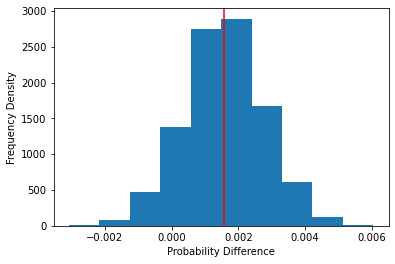

In [30]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff,color='r')
plt.ylabel('Frequency Density')
plt.xlabel('Probability Difference')
plt.show()

The above graph shows that it is very likely the null hypothesis should be rejected, as about half the values simulated are above the observed difference.

Now calculating what proportion of the simulated probability differences are greater than the observed probability difference calculated earlier. This will confirm or deny H_0.

In [31]:
obs_diff

0.0015790565976871451

In [57]:
proportion = (p_diffs > obs_diff).sum()
proportion_value = proportion/len(p_diffs)

In [58]:
proportion_value

0.4965

Here we see that nearly 50% of the simulated probability differences are greater than the observed difference. This suggests that the observed difference lies close to the center of the probability difference distribution and therefore is not statistically significant.

However it is also clear that the mean probabilty difference is greater than 0, which seems to contradict the null hypothesis. 

### Computing the Z-score using statsmodel.api

In [34]:
import statsmodels.api as sm


import numpy as np
from statsmodels.stats.proportion import proportions_ztest

convert_new = ab_cleaned[ab_cleaned['group']=='treatment']['converted'].sum()
convert_old = ab_cleaned[ab_cleaned['group']=='control']['converted'].sum()

n_old = control['landing_page']
n_new = treatment['landing_page']

# array with the numbers of converted customers in both control and treatment groups
count = np.array([convert_old, convert_new])
# total number of observations in each group
number_of_obs = np.array([n_old, n_new])
# Calculates the p-value for these two samples
stat, pval = proportions_ztest(count, number_of_obs, alternative='larger')

In [35]:
print(pval)

0.09482629485940902


The p-value here is 9.48%. This is much greater than the significance level chosen of 5%. Therefore the result here is *not* statistically significant and the null hypothesis, the conversion rates for both old and new pages are equal, is accepted.

## Performing an A/B test using regression

As this is a classification problem, logistic regression was used.

Some pre-processing was necessary:

1. A new column 'intercept' was created.
2. A column 'ab_page' which essentially encodes the treatment as '1' and the control as '0'.

In [36]:
ab_cleaned['intercept'] = 1
ab_cleaned.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1


In [37]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
ab_cleaned['ab_page'] = lb.fit_transform(ab_cleaned['group'])

In [38]:
ab_cleaned.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [39]:
ab_cleaned.tail()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
290584,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


Using logistic regression model to fit the data:

In [55]:
x = ab_cleaned[['intercept','ab_page']]
y = ab_cleaned['converted']
model = sm.Logit(y,x)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:               8.085e-06
Time:                        09:26:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

### Conclusions based on this Logistic Regression model:

The p-value of this model is 19.0%. This is much higher than the significance level of 5%. It means that the difference in probabilities of conversion is statistically insignificant.

In this case, the p-value calculated is different because the logistic regression model uses a sigma function as the probability distribution, whereas calculating z-scores relies on the normal distribution. These are two very differently shaped distributions and they produce different results. 

### What is the impact of the user's country, if there is any impact, on the conversion rate?

A new set of data had to be imported and joined to the cleaned A/B testing data on the column 'user_id'.

This was then used to estimate the impact of the user's country on the conversion rate.

In [59]:
countries = pd.read_csv('countries.csv')

In [60]:
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [61]:
df_merged = pd.merge(countries,ab_cleaned, how='left', on=['user_id'])

In [62]:
df_merged.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [67]:
df_merged.tail()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page
290580,653118,0,2017-01-09 03:12:31.034796,control,old_page,0,1,0
290581,878226,0,2017-01-05 15:02:50.334962,control,old_page,0,1,0
290582,799368,0,2017-01-09 18:07:34.253935,control,old_page,0,1,0
290583,655535,1,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1
290584,934996,0,2017-01-09 00:30:08.377677,control,old_page,0,1,0


Turning the categorical data for 'countries' into binary values:

In [64]:
df_merged['country'] = pd.get_dummies(df_merged['country'])

In [66]:
df_merged['country']

0         0
1         0
2         0
3         0
4         0
         ..
290580    0
290581    0
290582    0
290583    1
290584    0
Name: country, Length: 290585, dtype: uint8

In [65]:
df_merged.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page
0,834778,0,2017-01-14 23:08:43.304998,control,old_page,0,1,0
1,928468,0,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,0,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,0,2017-01-22 03:14:24.763511,control,old_page,0,1,0
4,710616,0,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


Now fitting the logistic regression model, but with two independent variables instead of one:

In [68]:
model2 = sm.Logit(df_merged['converted'],df_merged[['intercept', 'ab_page','country']])
results = model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:               2.065e-05
Time:                        09:41:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1112
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9867      0.008   -243.359      0.000      -2.003      -1.971
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
country       -0.0434      0.027     -1.627      0.104      -0.096       0.009
==============================================================================
"""

### Conclusions:

The model provides a p-value of 11.1%. 

The null hypothesis is that country has no effect on the result. This was tested with a significance level of 5%. It is a right-tailed test.

The outcome is that the calculated p-value is greater than the significance level of 5%.

This leads us to conclude that country does not have a statistically significant effect on the conversion rate.

### Other possible factors which should be accounted for:

There are some limitations of this model.

Its result differs partly because it assumes a logistic regression rather than a normal distribution. The functions employed in both cases are quite different.

Further questions to be explored:

- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?